In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas

In [89]:
%run variables_functions.ipynb

In [70]:
panel = pd.read_csv('Data_Treatment/treated_data/Panel/panel_prod_quant.csv', sep = ';').drop('Unnamed: 0', axis = 1)
states_loc = pd.read_csv('Data_Treatment/treated_data/States/states_loc.csv',sep=';').drop('Unnamed: 0', axis = 1)

In [75]:
panel_complete = panel.join(states_loc.set_index('State'), on = 'State', how = 'left')

In [76]:
number_units_total = panel_complete[['Time','Plant_Id','Gas_Plants']].groupby('Time').sum()
units_coal_total = panel_complete[['Time','Plant_Id']].groupby('Time').sum().reset_index()
units_gas_total = panel_complete[['Time','Gas_Plants']].groupby('Time').sum().reset_index()

units_coal_states = panel_complete[['Time','State','Plant_Id']].pivot(index='Time', columns='State')
units_gas_states = panel_complete[['Time','State','Gas_Plants']].pivot(index='Time', columns='State')

prod_coal_states = panel_complete[['Time','State','Production_GWh']].pivot(index='Time', columns='State')
prod_gas_states = panel_complete[['Time','State','Gas_Production_GWh']].pivot(index='Time', columns='State')

Text(0.5, 1.0, 'Total of coal units in the USA')

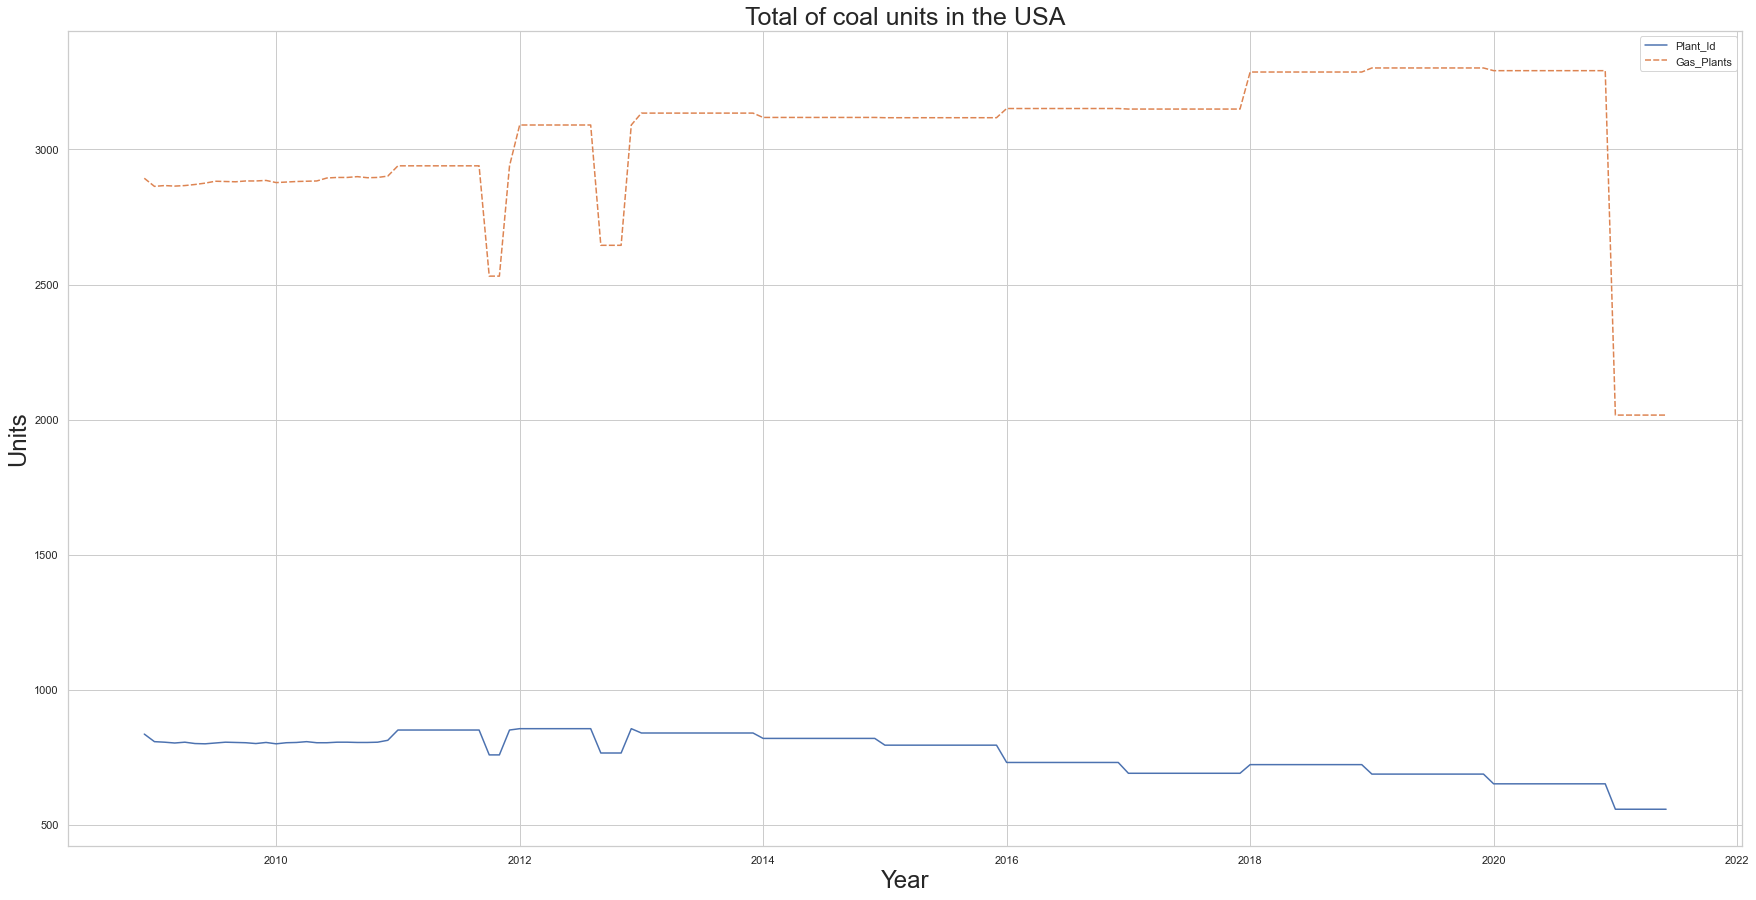

In [57]:
sns.set(style="whitegrid")
plot = sns.lineplot(data = number_units_total)
sns.set(rc={'figure.figsize':(30,15)})
plot.set_ylabel('Units', size = 24)
plot.set_xlabel('Year', size = 24)
plot.set_title('Total of coal units in the USA',size = 25)

Text(0.5, 1.0, 'Total of Gas plants in the USA')

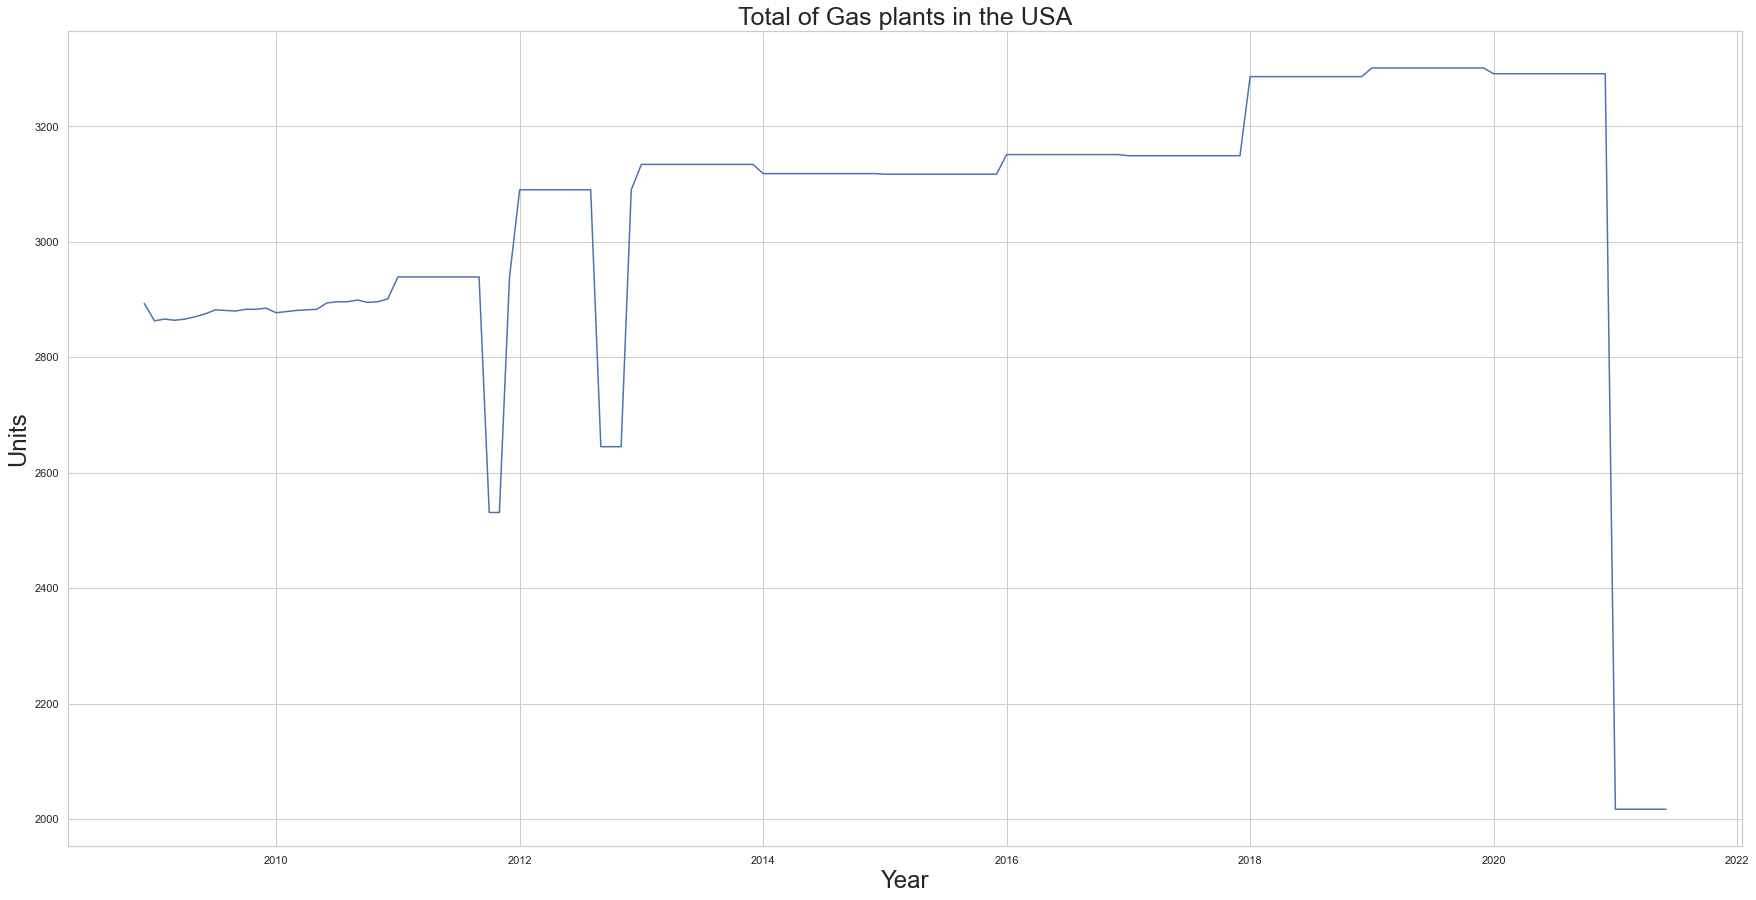

In [60]:
sns.set(style="whitegrid")
plot = sns.lineplot(x = 'Time', y = 'Gas_Plants', data = units_gas_total)
sns.set(rc={'figure.figsize':(30,15)})
plot.set_ylabel('Units', size = 24)
plot.set_xlabel('Year', size = 24)
plot.set_title('Total of Gas plants in the USA',size = 25)

Text(0.5, 1.0, 'Total of Coal Plants per State USA')

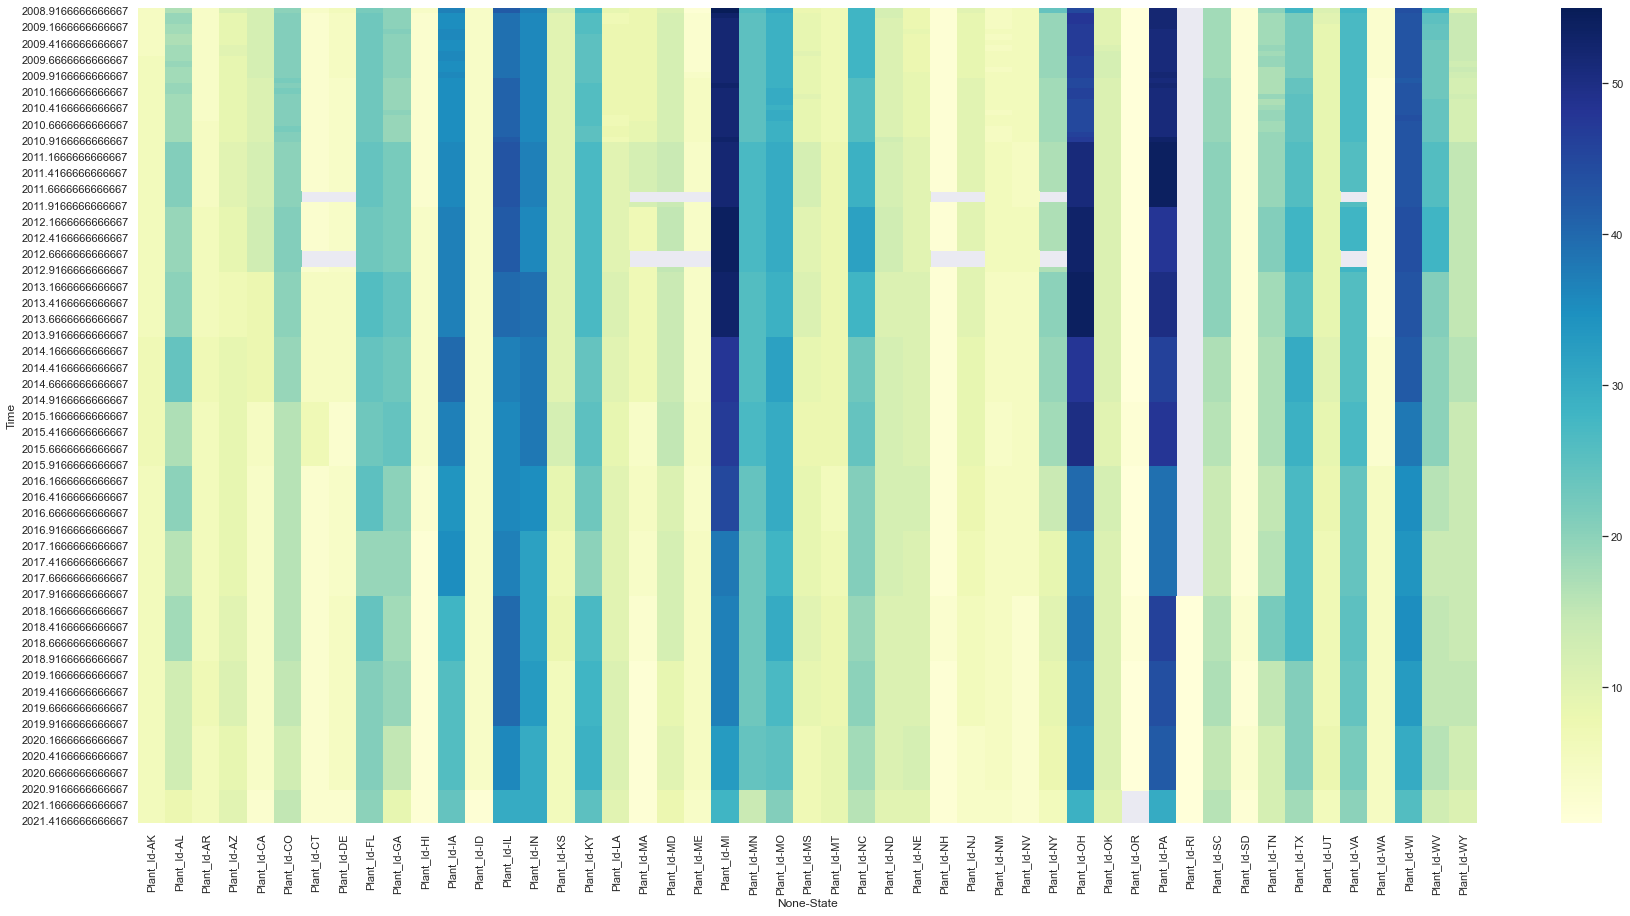

In [64]:
ax = sns.heatmap(units_coal_states,
                 cmap="YlGnBu")
plot.set_ylabel('Year', size = 30)
plot.set_xlabel('State', size = 30)
plot.set_title('Total of Coal Plants per State USA', size = 36)

Text(0.5, 1.0, 'Total of Coal Plants per State USA')

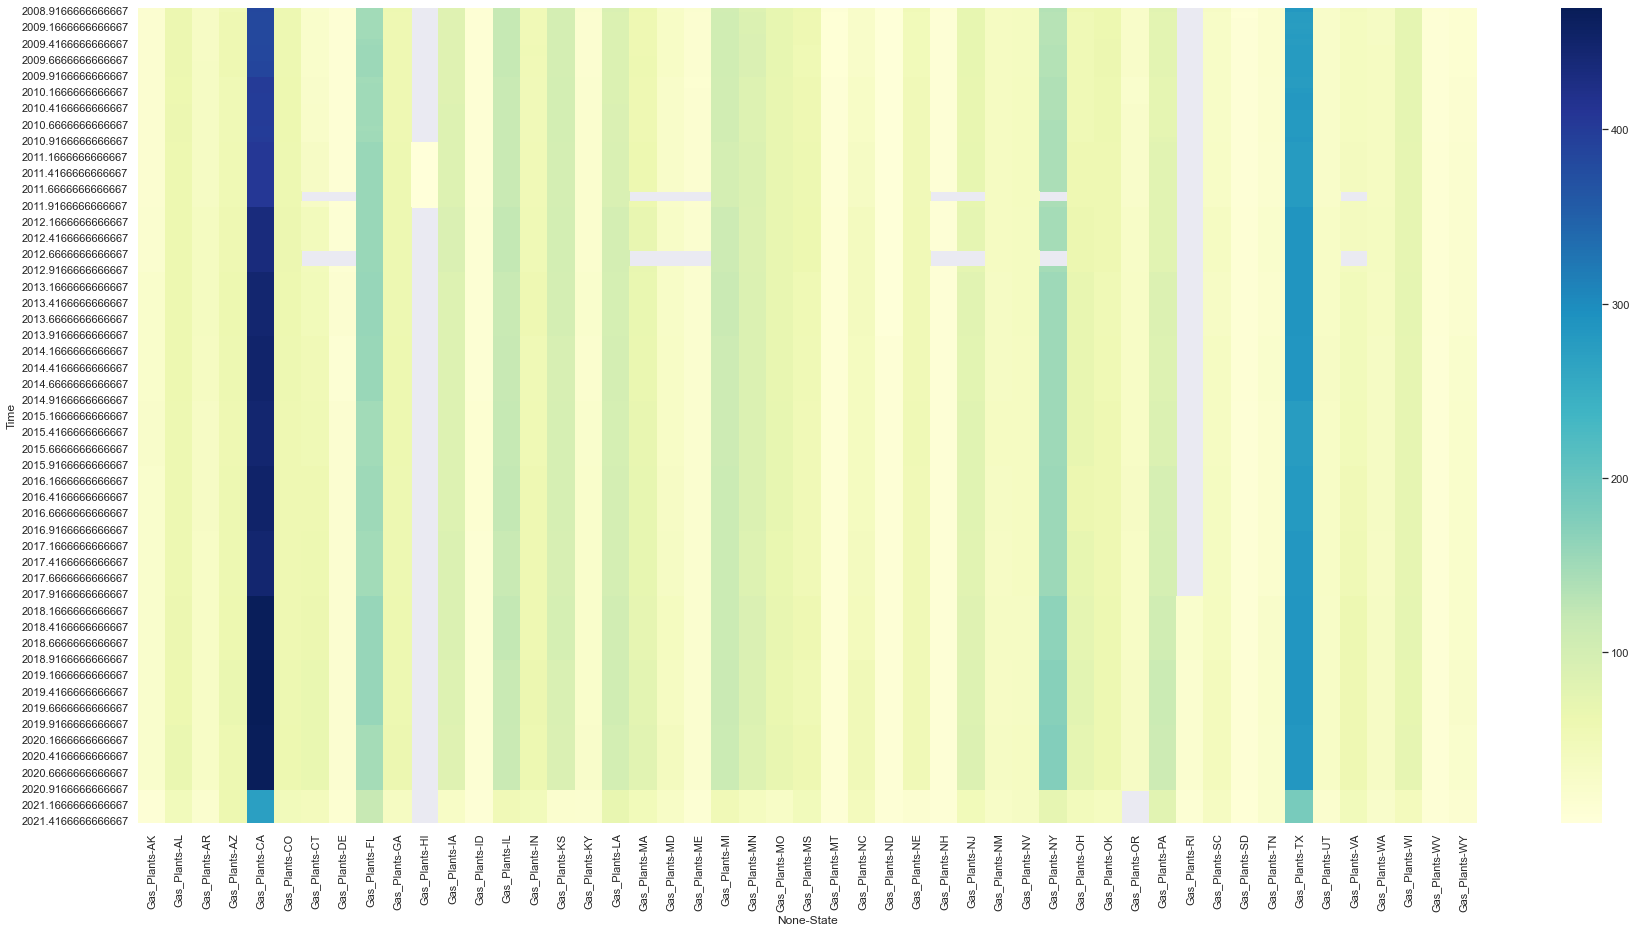

In [65]:
ax = sns.heatmap(units_gas_states,
                 cmap="YlGnBu")
plot.set_ylabel('Year', size = 30)
plot.set_xlabel('State', size = 30)
plot.set_title('Total of Coal Plants per State USA', size = 36)

Text(0.5, 1.0, 'Gas Production per State USA')

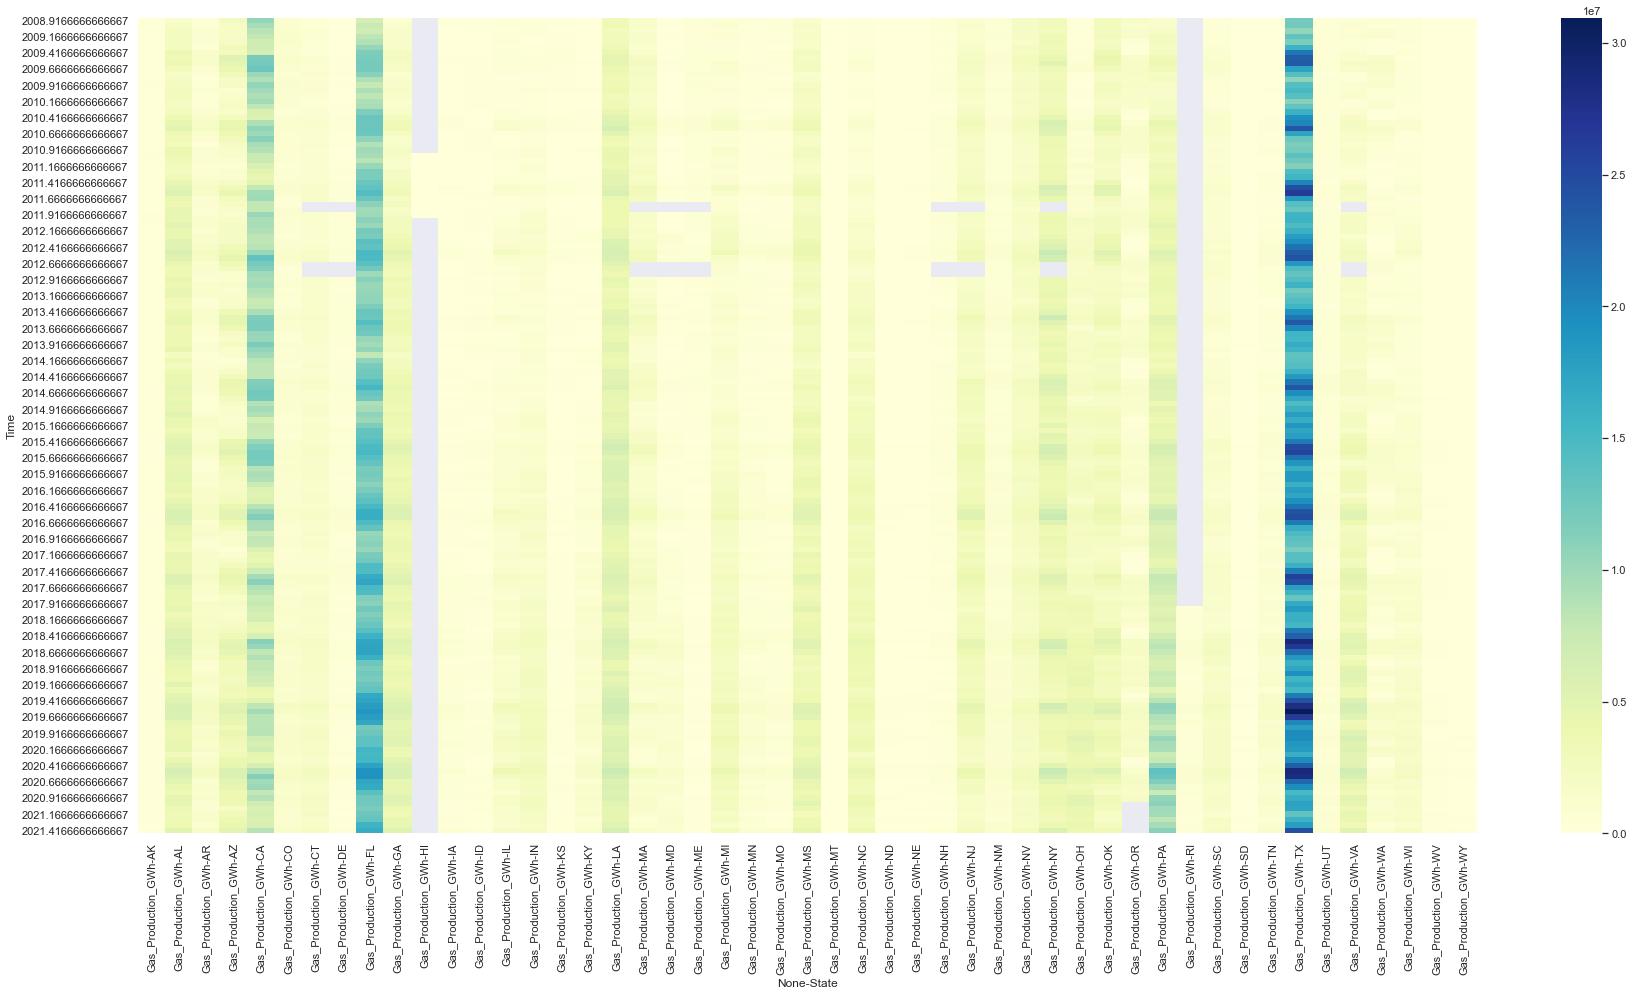

In [67]:
ax = sns.heatmap(prod_gas_states,
                 cmap="YlGnBu")
plot.set_ylabel('Year', size = 30)
plot.set_xlabel('State', size = 30)
plot.set_title('Gas Production per State USA', size = 36)


# USA Maps

In [80]:
path = '/Users/LuanVitor/Documents/Estudos e Profissional/Computing/Data Visualization/USA Map/'
geo_usa = geopandas.read_file(path+'cb_2018_us_state_20m')

In [91]:
geo_usa['State'] = geo_usa.NAME.apply(lambda x:us_state_to_abbrev[x])

In [97]:
panel_complete['Year'] = panel_complete['Time'].apply(lambda x: int(str(x).split('.')[0]))

In [116]:
panel_complete.columns

Index(['Time', 'State', 'Coal_prices', 'Gas_prices', 'Demand_GWh',
       'Solar_Production_GWh', 'Wind_Production_GWh', 'Production_GWh',
       'Gas_Production_GWh', 'Gas_Plants', 'Total_Production_GWh', 'Plant_Id',
       'Ratio', 'latitude', 'longitude', 'Year'],
      dtype='object')

In [127]:
production_state_2009 = panel_complete[['Year','State','Production_GWh','Gas_Production_GWh']].where(panel_complete.Year==2009).groupby(['Year','State']).sum()
production_state_latlong_2009 = production_state_2009.join(states_loc.set_index('State'), on = 'State', how = 'left').reset_index()

production_state_2020 = panel_complete[['Year','State','Production_GWh','Gas_Production_GWh']].where(panel_complete.Year==2020).groupby(['Year','State']).sum()
production_state_latlong_2020 = production_state_2020.join(states_loc.set_index('State'), on = 'State', how = 'left').reset_index()

## Total Production

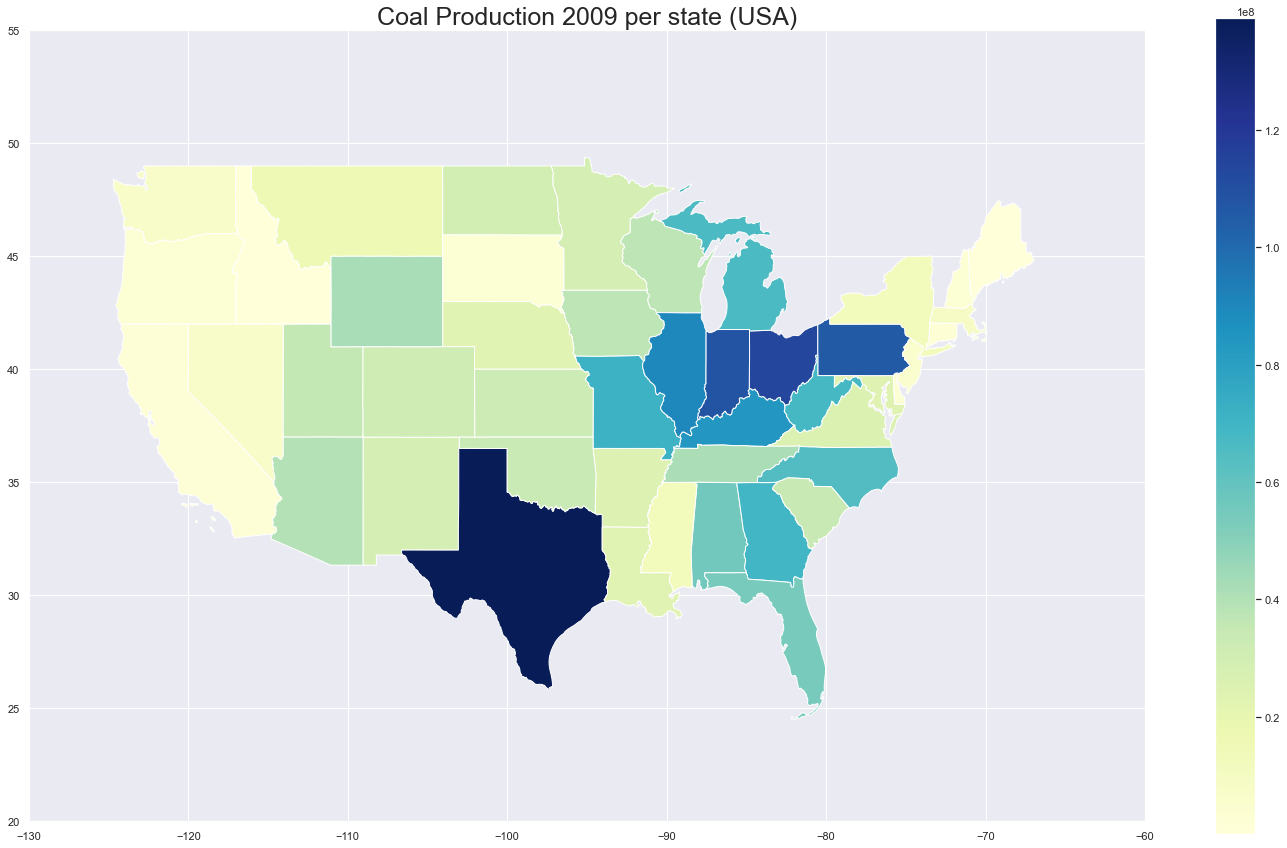

In [211]:
# merge usa_state data and geo_usa shapefile
geo_merge=geo_usa.merge(production_state_2009,on='State')
# plot USA map 
geo_merge.plot(column='Production_GWh',figsize=(25, 15),legend=True,cmap='YlGnBu')
plt.xlim(-130,-60)
plt.ylim(20,55)
# add countries names and numbers 
#for i in range(len(geo_merge)):
#    plt.text(geo_merge.longitude[i],geo_merge.latitude[i],"{}\n{}".format(geo_merge.NAME[i],geo_merge.Variation[i]),size=10)
plt.title('Coal Production 2009 per state (USA)',fontsize=25)
plt.show()

## Variation Production

In [156]:
production_2009_2020 = panel_complete[['Year','State','Production_GWh','Gas_Production_GWh']].where((panel_complete.Year==2009)|(panel_complete.Year==2020)).groupby(['Year','State']).sum().reset_index()

df_tool = production_2009_2020[['Year','State','Production_GWh','Gas_Production_GWh']].set_index(['Year','State']).groupby('State').pct_change().reset_index()
df_tool['Coal_Variation'] = df_tool.Production_GWh.fillna(0)*100
df_tool['Gas_Variation'] = df_tool.Gas_Production_GWh.fillna(0)*100

df_tool= df_tool.drop(['Production_GWh','Gas_Production_GWh'],axis=1)

var_prod_2009_2020 = df_tool.join(states_loc.set_index('State'), on = 'State', how = 'left').reset_index()
var_prod_2009_2020['Coal_Decrease'] = var_prod_2009_2020.Coal_Variation.apply(lambda x: (-x))

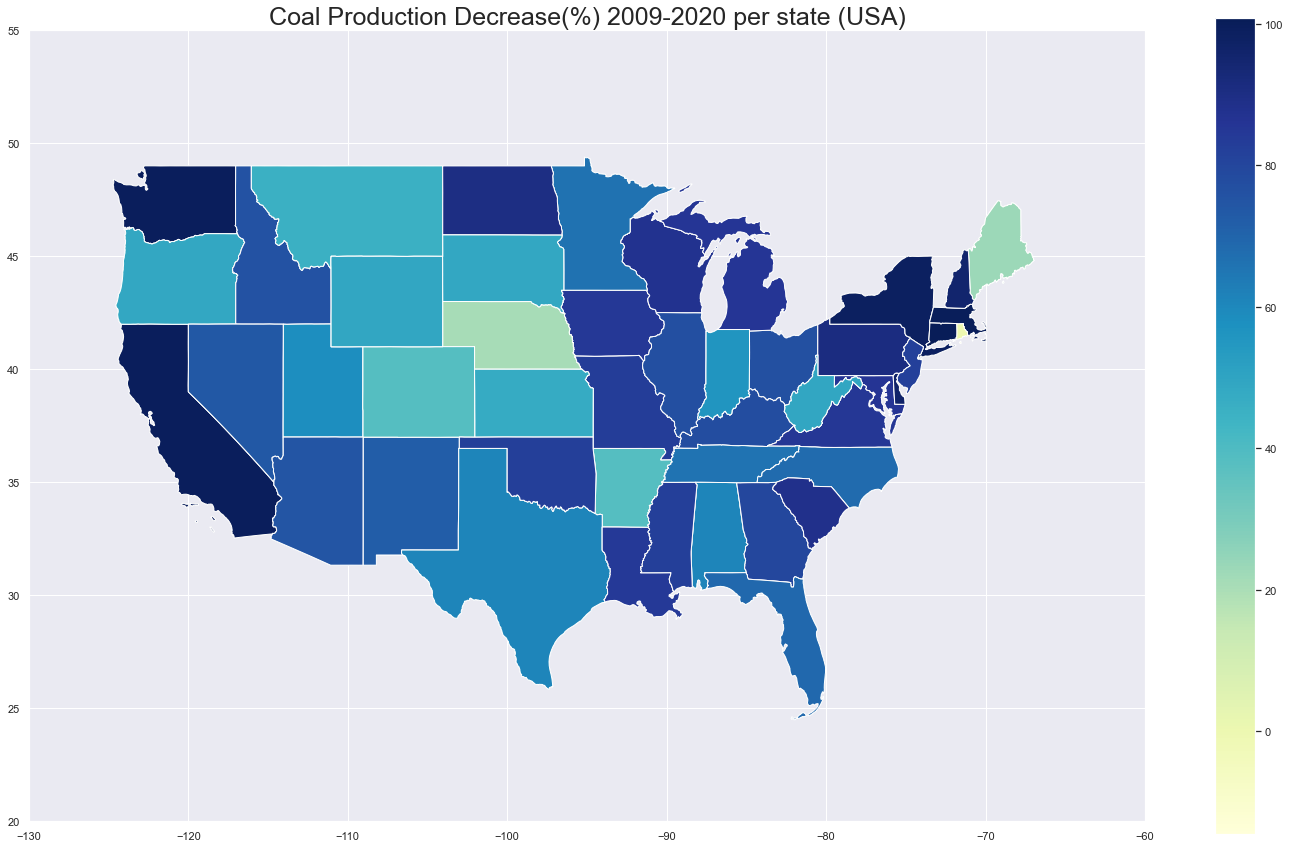

In [208]:
# merge usa_state data and geo_usa shapefile
geo_merge=geo_usa.merge(var_prod_2009_2020,on='State')
# plot USA map 
geo_merge.plot(column='Coal_Decrease',figsize=(25, 15),legend=True,cmap='YlGnBu')
plt.xlim(-130,-60)
plt.ylim(20,55)
# add countries names and numbers 
#for i in range(len(geo_merge)):
#    plt.text(geo_merge.longitude[i],geo_merge.latitude[i],"{}\n{}".format(geo_merge.NAME[i],geo_merge.Variation[i]),size=10)
plt.title('Coal Production Decrease(%) 2009-2020 per state (USA)',fontsize=25)
plt.show()

## Total Plants

In [181]:
plants_state_2009 = panel_complete[['Year','State','Plant_Id','Gas_Plants']].where(panel_complete.Year==2009).groupby(['Year','State']).sum()
plants_state_2009 = plants_state_2009.rename(columns = {'Plant_Id':'Coal_Plants'})
plants_state_latlong_2009 = plants_state_2009.join(states_loc.set_index('State'), on = 'State', how = 'left').reset_index()

plants_state_2020 = panel_complete[['Year','State','Plant_Id','Gas_Plants']].where(panel_complete.Year==2020).groupby(['Year','State']).sum()
plants_state_2020 = plants_state_2020.rename(columns = {'Plant_Id':'Coal_Plants'})
plants_state_latlong_2020 = plants_state_2020.join(states_loc.set_index('State'), on = 'State', how = 'left').reset_index()

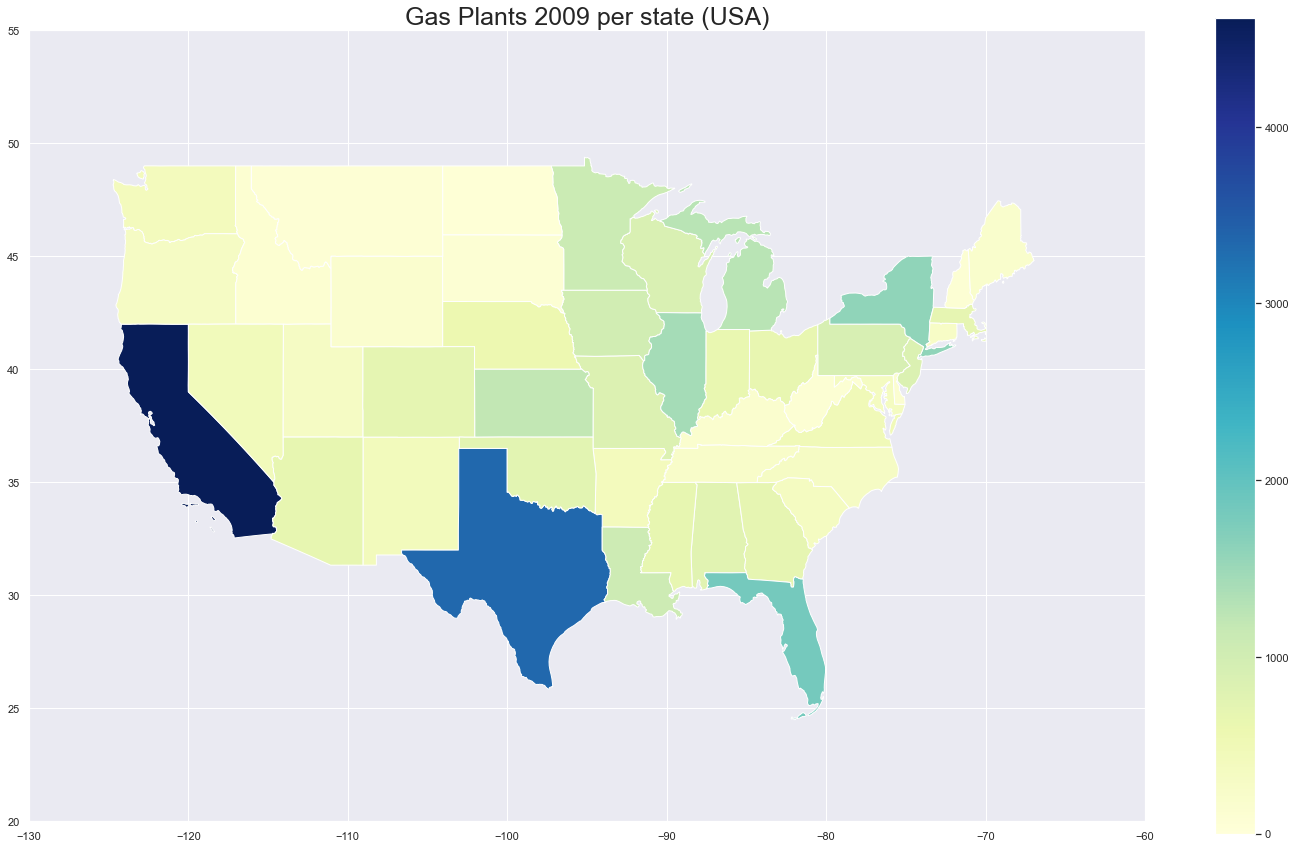

In [203]:
# merge usa_state data and geo_usa shapefile
geo_merge=geo_usa.merge(plants_state_latlong_2009,on='State')
# plot USA map 
geo_merge.plot(column='Gas_Plants' ,figsize=(25, 15),legend=True,cmap='YlGnBu')
plt.xlim(-130,-60)
plt.ylim(20,55)
# add countries names and numbers 
#for i in range(len(geo_merge)):
#    plt.text(geo_merge.longitude[i],geo_merge.latitude[i],"{}\n{}".format(geo_merge.NAME[i],geo_merge.Variation[i]),size=10)
plt.title('Gas Plants 2009 per state (USA)',fontsize=25)
plt.show()

## Variation Plants

In [173]:
plants_2009_2020 = panel_complete[['Year','State','Plant_Id','Gas_Plants']].where((panel_complete.Year==2009)|(panel_complete.Year==2020)).groupby(['Year','State']).sum().reset_index()

plants_2009_2020 = plants_2009_2020.rename(columns = {'Plant_Id':'Coal_Plants'})

df_tool = plants_2009_2020[['Year','State','Coal_Plants','Gas_Plants']].set_index(['Year','State']).groupby('State').pct_change().reset_index()
df_tool['Coal_Variation'] = df_tool.Coal_Plants.fillna(0)*100
df_tool['Gas_Variation'] = df_tool.Gas_Plants.fillna(0)*100

df_tool= df_tool.drop(['Coal_Plants','Gas_Plants'],axis=1)

var_plants_2009_2020 = df_tool.join(states_loc.set_index('State'), on = 'State', how = 'left').reset_index()
var_plants_2009_2020['Coal_Decrease'] = var_plants_2009_2020.Coal_Variation.apply(lambda x: (-x))

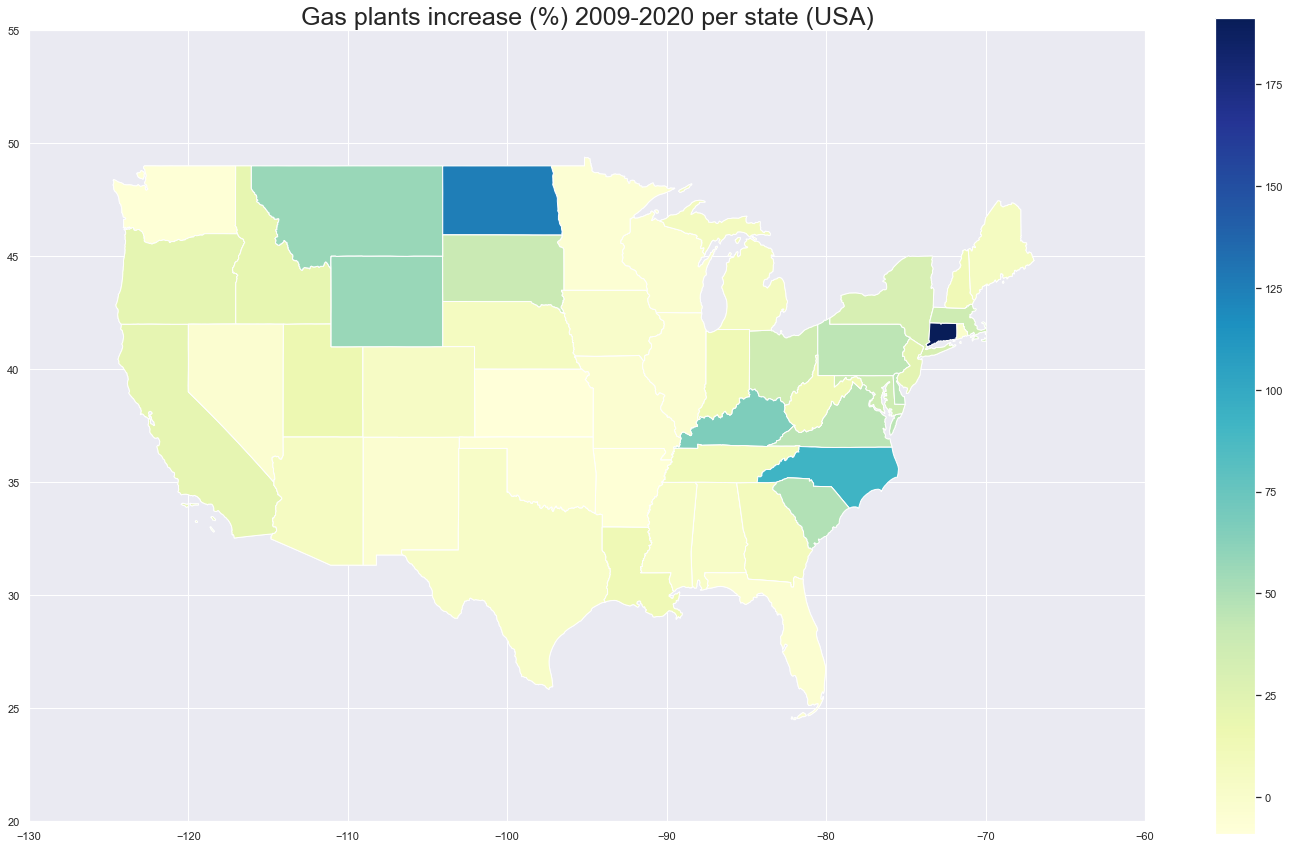

In [198]:
# merge usa_state data and geo_usa shapefile
geo_merge=geo_usa.merge(var_plants_2009_2020,on='State')
# plot USA map 
geo_merge.plot(column='Gas_Variation',figsize=(25, 15),legend=True,cmap='YlGnBu')
plt.xlim(-130,-60)
plt.ylim(20,55)
# add countries names and numbers 
#for i in range(len(geo_merge)):
#    plt.text(geo_merge.longitude[i],geo_merge.latitude[i],"{}\n{}".format(geo_merge.NAME[i],geo_merge.Variation[i]),size=10)
plt.title('Gas plants increase (%) 2009-2020 per state (USA)',fontsize=25)
plt.show()